In [441]:
import numpy as np 
import pandas as pd 
import plotly.express as px

In [442]:
data = pd.read_csv('./500_Person_Gender_Height_Weight_Index.csv')
data_visual = pd.read_csv('./500_Person_Gender_Height_Weight_Index.csv')

In [443]:
def convert_status_to_description(x):
    indexes = {0: 'Extremely Weak',1:'Weak', 2:'Normal', 3:'Overweight', 4:'Obesity', 5:'Extreme Obesity'}
    return indexes.get(x['Index'])

data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status
0,Male,174,96,4,Obesity
1,Male,189,87,2,Normal
2,Female,185,110,4,Obesity
3,Female,195,104,3,Overweight
4,Male,149,61,3,Overweight


In [444]:
def convert_gender_to_label(x):
     return 1 if x['Gender'] == 'Male' else 0

data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
4,Male,149,61,3,Overweight,1


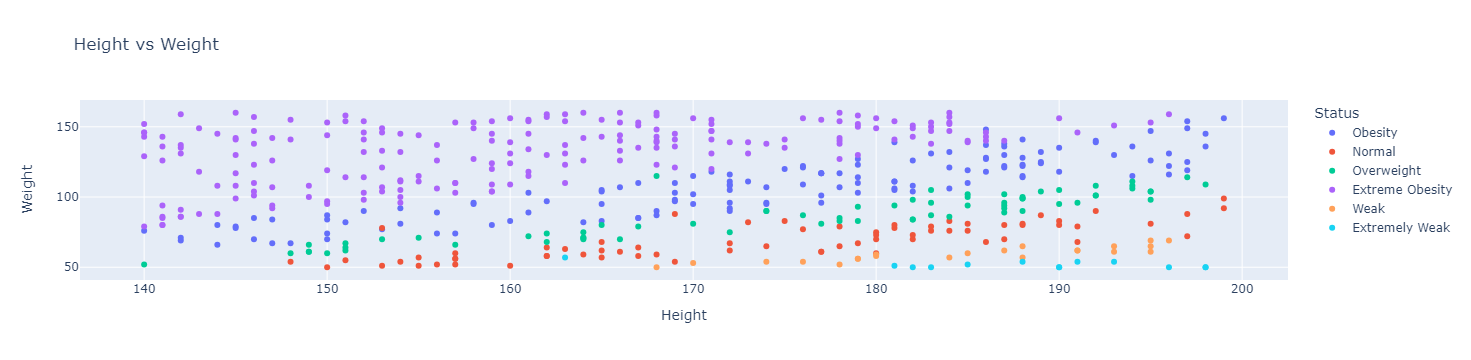

In [445]:
fig = px.scatter(data_visual, x="Height", y="Weight", color="Status", title="Height vs Weight")
fig.show()

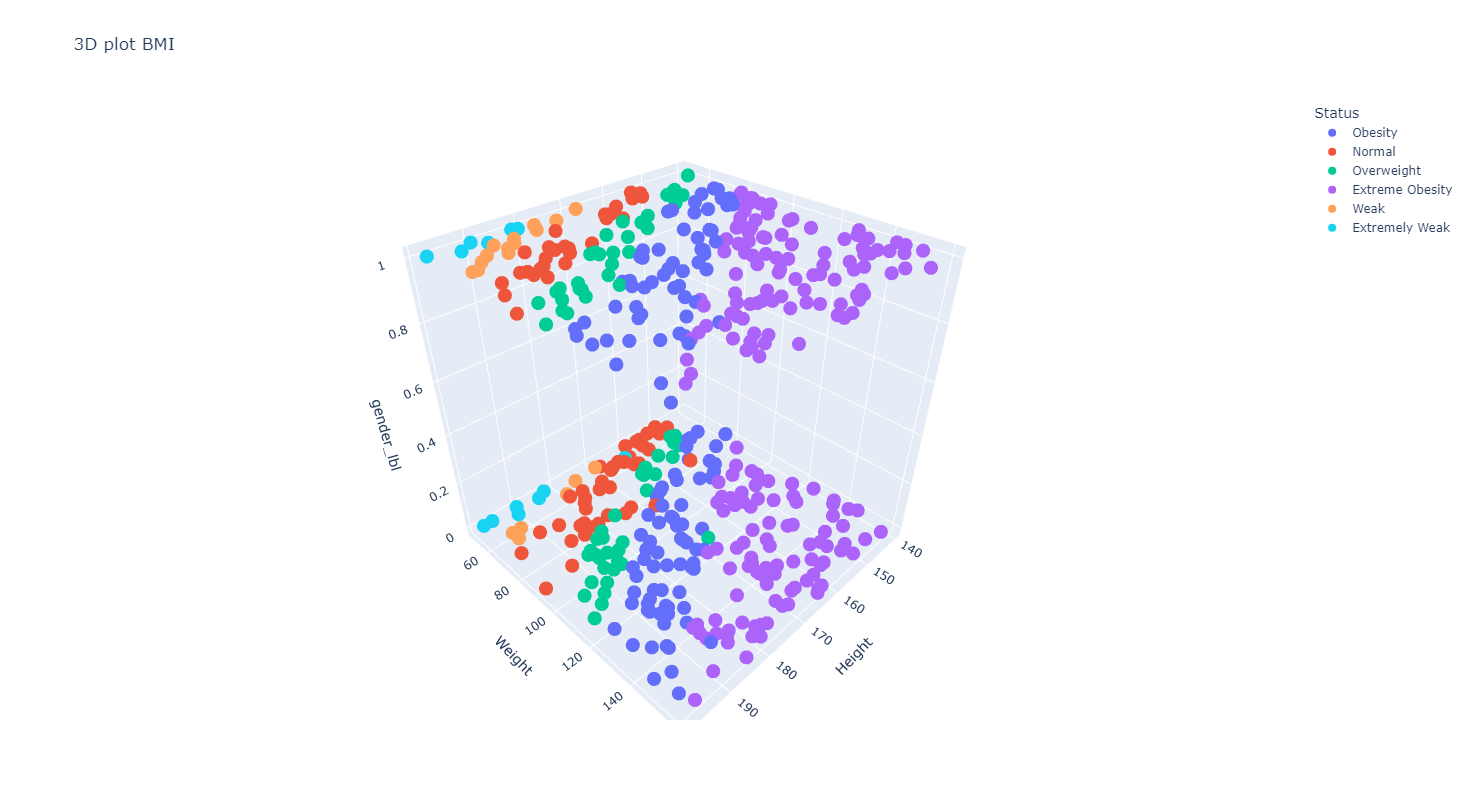

In [446]:
fig = px.scatter_3d(data_visual, x='Height', y='Weight', z='gender_lbl',
              color='Status', width=1200, height=800, title="3D plot BMI")
fig.show()

In [447]:
people = data_visual['Gender'].value_counts() 
people.head()

Gender
Female    255
Male      245
Name: count, dtype: int64

In [448]:
categories = data_visual['Status'].value_counts() 
categories

Status
Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: count, dtype: int64

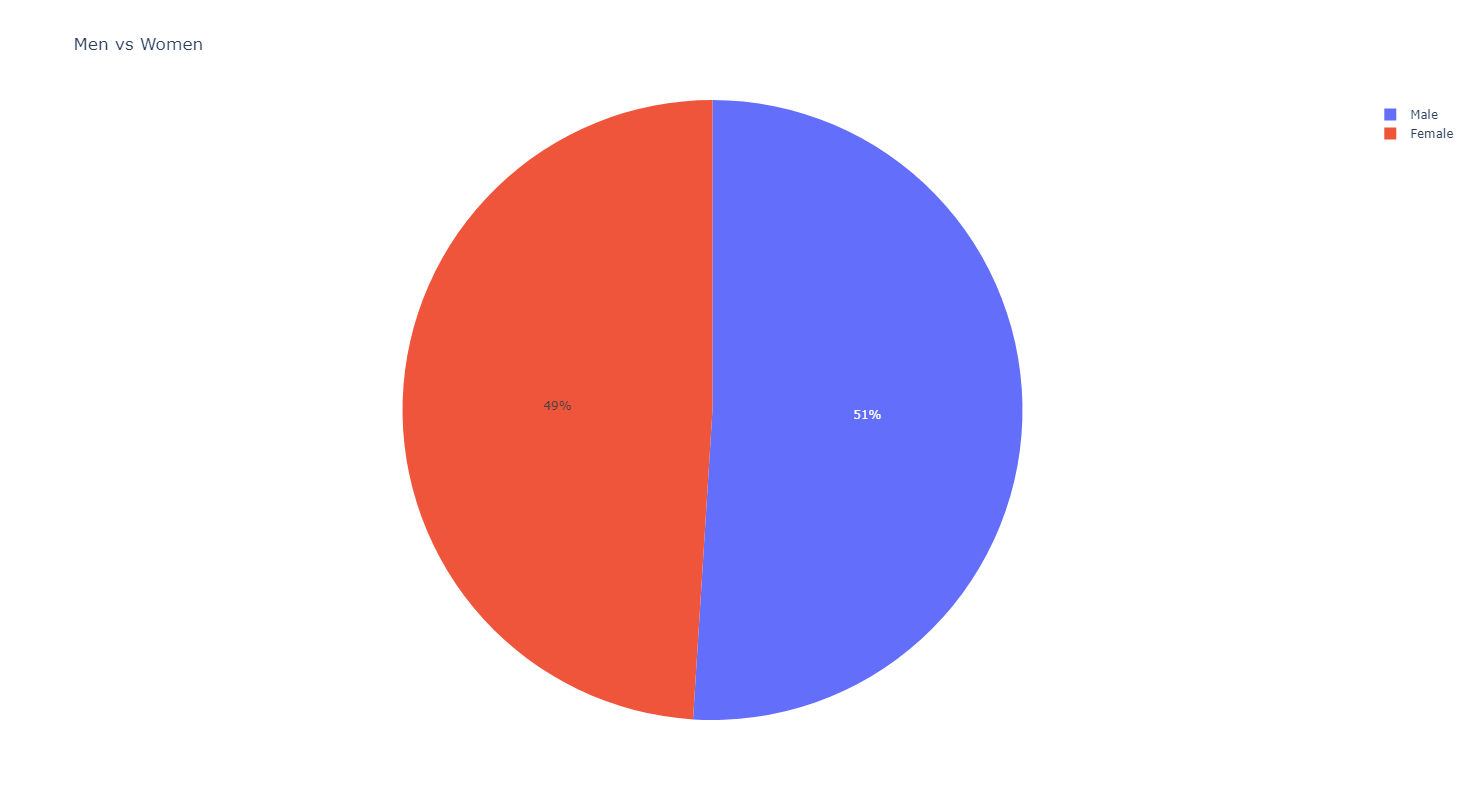

In [449]:
fig = px.pie(people, values='count', names=["Male","Female"], title='Men vs Women',width=1200, height=800,)
fig.show()

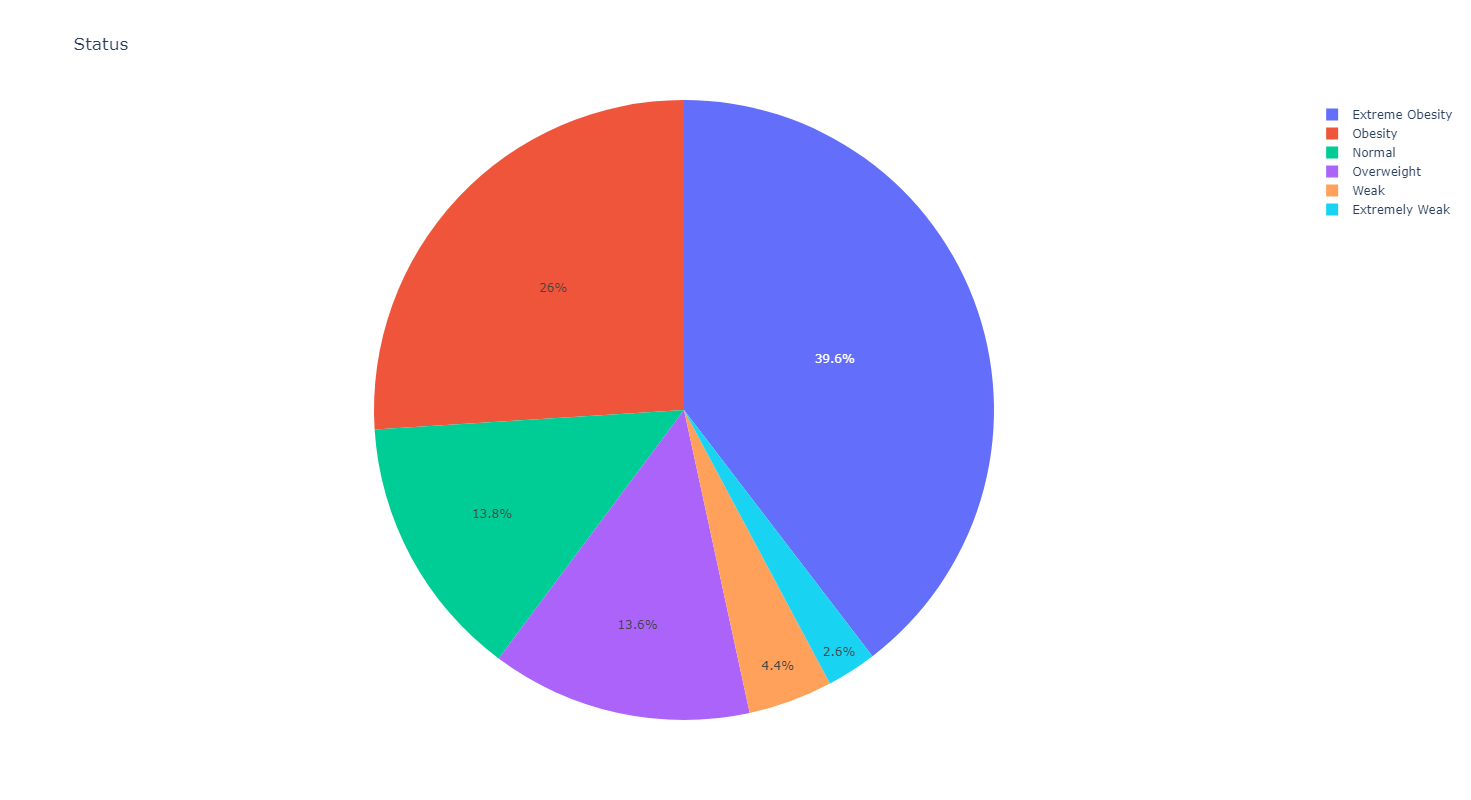

In [450]:
fig = px.pie(categories, values='count', names=list(list(categories.index)), title='Status',width=1200, height=800,)
fig.show()

In [451]:
data_visual_male = data_visual[data_visual['Gender']=='Male']
data_visual_male.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,Male,174,96,4,Obesity,1
1,Male,189,87,2,Normal,1
4,Male,149,61,3,Overweight,1
5,Male,189,104,3,Overweight,1
6,Male,147,92,5,Extreme Obesity,1


In [452]:
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Status
Extreme Obesity    105
Obesity             59
Overweight          32
Normal              28
Weak                15
Extremely Weak       6
Name: count, dtype: int64

In [453]:
data_visual_female = data_visual[data_visual['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Status,gender_lbl
2,Female,185,110,4,Obesity,0
3,Female,195,104,3,Overweight,0
9,Female,169,103,4,Obesity,0
11,Female,159,80,4,Obesity,0
12,Female,192,101,3,Overweight,0


In [454]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Status
Extreme Obesity    93
Obesity            71
Normal             41
Overweight         36
Weak                7
Extremely Weak      7
Name: count, dtype: int64

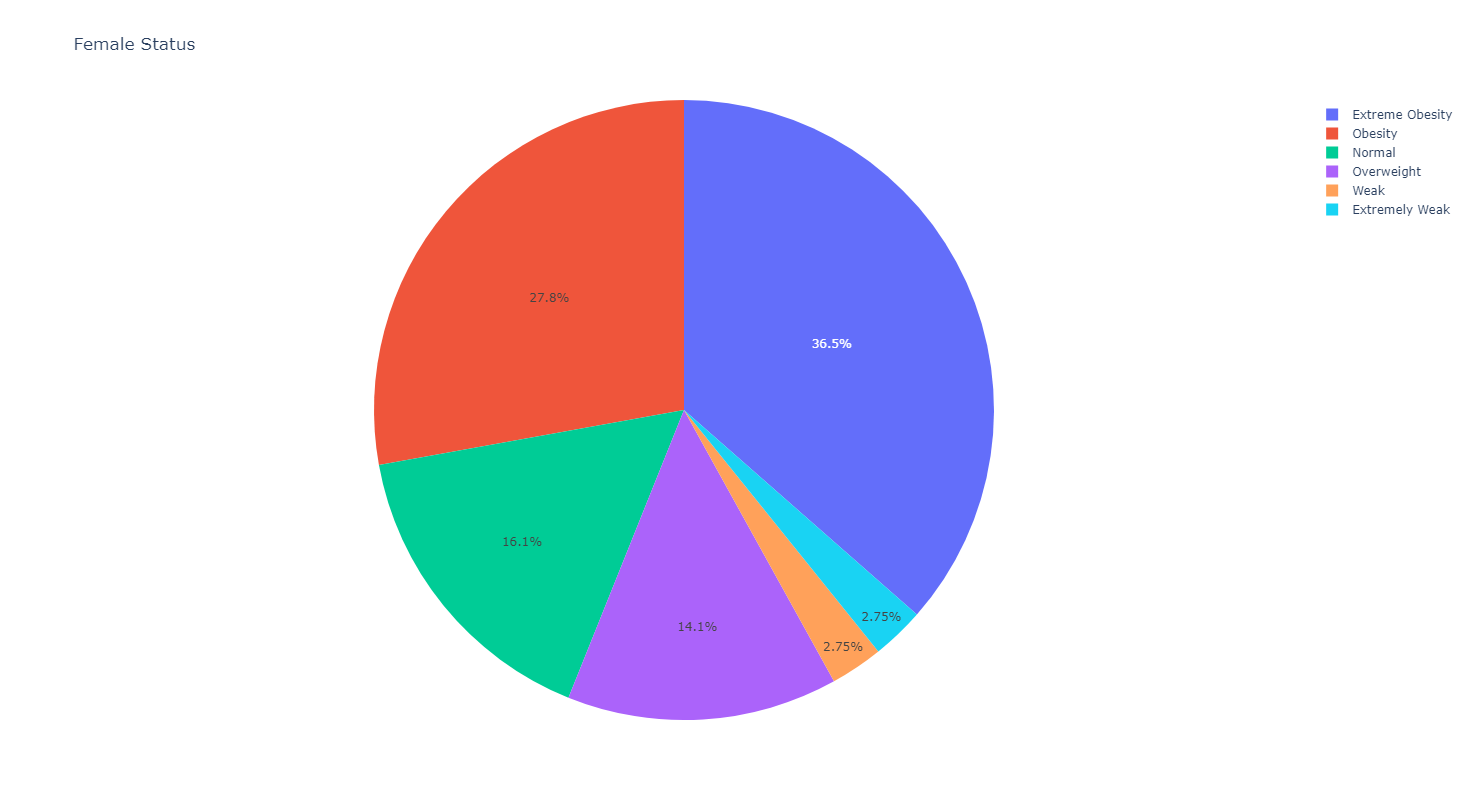

In [455]:
fig = px.pie(data_visual_female_categories, values='count', names=list(list(data_visual_female_categories.index)), title='Female Status',width=1200, height=800,)
fig.show()

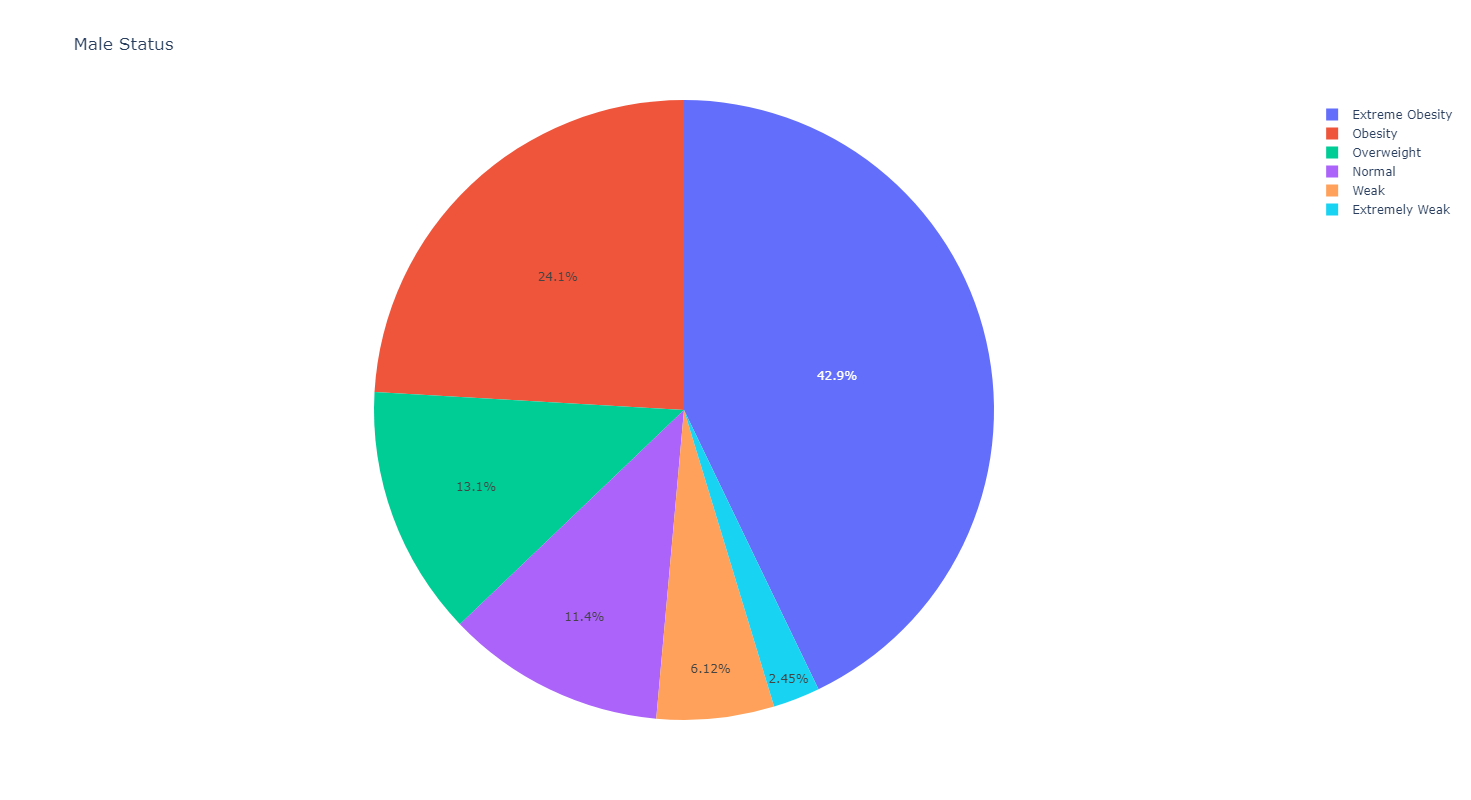

In [456]:
fig = px.pie(data_visual_male_categories, values='count', names=list(list(data_visual_male_categories.index)), title='Male Status',width=1200, height=800,)
fig.show()

## ML Part

In [457]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
data.iloc[:,0] = lbl_enc.fit_transform(data.iloc[:,0])
data.iloc[:,0]

0      1
1      1
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    1
499    1
Name: Gender, Length: 500, dtype: object

In [458]:
df = pd.DataFrame(data)
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [459]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [460]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [461]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="gini",max_depth=50)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [484]:
y_pred_rfc = clf.predict(X_test)

In [463]:
y_pred_rfc

array([5, 5, 4, 5, 5, 5, 3, 5, 4, 5, 2, 2, 2, 5, 5, 3, 5, 3, 5, 4, 4, 3,
       3, 4, 2, 1, 5, 4, 4, 2, 2, 5, 5, 5, 4, 0, 5, 3, 5, 2, 5, 4, 4, 4,
       4, 3, 5, 2, 5, 5, 4, 4, 2, 5, 5, 3, 4, 4, 1, 5, 4, 4, 4, 1, 4, 4,
       2, 3, 5, 5, 5, 5, 4, 4, 4, 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 2, 5, 5,
       5, 4, 4, 2, 3, 1, 3, 1, 3, 4, 0, 3], dtype=int64)

In [464]:
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

85.0

In [465]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [466]:
y_pred_rfc = rfc.predict(X_test)

In [467]:
y_pred_rfc

array([5, 5, 4, 5, 5, 5, 3, 5, 4, 5, 2, 4, 2, 5, 5, 3, 5, 3, 5, 5, 4, 3,
       3, 4, 2, 1, 5, 4, 4, 2, 2, 5, 5, 5, 4, 0, 5, 4, 5, 2, 5, 4, 4, 4,
       4, 2, 4, 2, 5, 5, 4, 4, 3, 5, 5, 3, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4,
       2, 4, 5, 4, 5, 5, 3, 4, 4, 5, 4, 4, 5, 5, 5, 3, 4, 5, 5, 3, 5, 5,
       5, 4, 2, 2, 3, 1, 3, 1, 4, 4, 0, 3], dtype=int64)

In [468]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, y_pred_rfc)
rfc_acc*100

91.0

In [469]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(y_test, y_pred_rfc)
rfc_cm

array([[ 2,  1,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  9,  1,  0,  0],
       [ 0,  0,  1, 12,  2,  0],
       [ 0,  0,  1,  0, 30,  1],
       [ 0,  0,  0,  0,  2, 34]], dtype=int64)

## Save Model

In [470]:
import pickle

In [471]:
model_pkl_file = "BMI_model.pkl"  
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rfc, file)

In [497]:
dd = {'Gender': [1], 'Height': [189], 'Weight': [87]} 
    
test_d = pd.DataFrame(dd)

test_d

,Gender,Height,Weight
0,1,189,87


In [498]:
with open(model_pkl_file, 'rb') as file:  
   loaded_model=pickle.load(open(model_pkl_file, 'rb'))

result = loaded_model.score(X_test, y_test)

prediction = loaded_model.predict(test_d)

In [501]:
prediction[0]

2